In [22]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv("C:\\Users\\GauravMathur\\Desktop\\Recommendation System\\ratings.csv")

In [24]:
df_rename = df.rename(index= str, columns = {'movieId': 'item_id', 'userId': 'user_id'})

In [25]:
df_rename.head(5)

,user_id,item_id,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [26]:
df_movie = pd.read_csv("C:\\Users\\GauravMathur\\Desktop\\Recommendation System\\movies.csv")

In [28]:
df_movie = df_movie.rename(index= str, columns = {'movieId': 'item_id'})

In [31]:
df_movie = df_movie.drop(columns = ['genres'])

In [37]:
movie_merge = pd.merge(df_rename,df_movie, on='item_id')

In [38]:
movie_merge.head()

,user_id,item_id,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,5,1,4.0,847434962,Toy Story (1995)
2,7,1,4.5,1106635946,Toy Story (1995)
3,15,1,2.5,1510577970,Toy Story (1995)
4,17,1,4.5,1305696483,Toy Story (1995)


In [39]:
###EDA

import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
movie_merge.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [43]:
movie_merge.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [44]:
ratings = pd.DataFrame(movie_merge.groupby('title')['rating'].mean())

In [45]:
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [46]:
ratings['num of ratings'] = pd.DataFrame(movie_merge.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<AxesSubplot:>

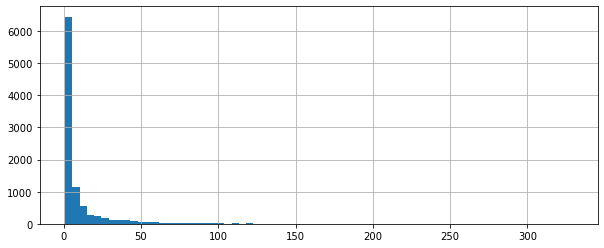

In [48]:
plt.figure(figsize= (10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

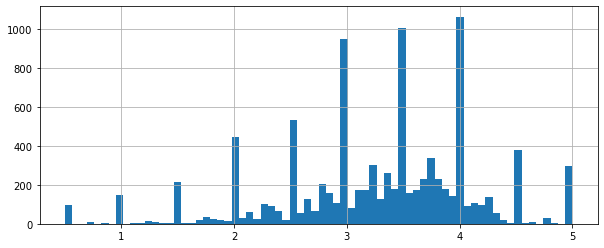

In [49]:
plt.figure(figsize= (10,4))
ratings['rating'].hist(bins=70)

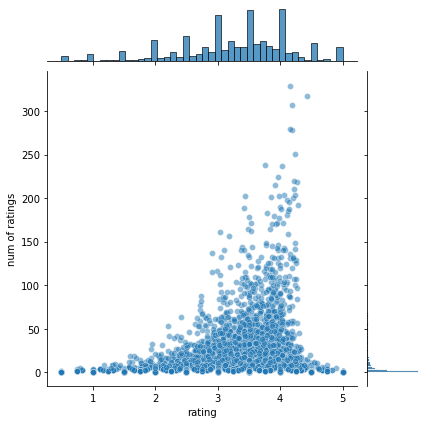

In [50]:
sns.jointplot(x= 'rating', y = 'num of ratings' , data = ratings, alpha = 0.5)

# Recommending Movies

In [52]:
moviemat = movie_merge.pivot_table(index = 'user_id', columns = 'title',values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
ratings.sort_values('num of ratings', ascending = False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [56]:
shawshank_ratings = moviemat['Shawshank Redemption, The (1994)']

In [57]:
shawshank_ratings.head()

user_id
1    NaN
2    3.0
3    NaN
4    NaN
5    3.0
Name: Shawshank Redemption, The (1994), dtype: float64

In [58]:
similar_to_shawshank = moviemat.corrwith(shawshank_ratings)

C:\Users\GauravMathur\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\GauravMathur\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [60]:
corr_shawshank = pd.DataFrame(similar_to_shawshank, columns = ['Correlation'])
corr_shawshank.dropna(inplace=True)
corr_shawshank.head()

,Correlation
title,
"'burbs, The (1989)",0.419543
(500) Days of Summer (2009),0.249580
*batteries not included (1987),0.404520
...And Justice for All (1979),-1.000000
10 Cloverfield Lane (2016),0.145671


In [61]:
corr_shawshank.sort_values('Correlation', ascending = False)

,Correlation
title,
"Principal, The (1987)",1.0
Chi-Raq (2015),1.0
Rififi (Du rififi chez les hommes) (1955),1.0
Robot & Frank (2012),1.0
Rock Star (2001),1.0
...,...
Police Story 2 (Ging chaat goo si juk jaap) (1988),-1.0
Police Story (Ging chaat goo si) (1985),-1.0
School Daze (1988),-1.0


In [64]:
corr_shawshank = corr_shawshank.join(ratings['num of ratings'])
corr_shawshank.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",0.419543,17
(500) Days of Summer (2009),0.249580,42
*batteries not included (1987),0.404520,7
...And Justice for All (1979),-1.000000,3
10 Cloverfield Lane (2016),0.145671,14


In [65]:
corr_shawshank[corr_shawshank['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
"Shawshank Redemption, The (1994)",1.000000,317
Four Weddings and a Funeral (1994),0.446212,103
Schindler's List (1993),0.402202,220
"Usual Suspects, The (1995)",0.394294,204
Ocean's Eleven (2001),0.391546,119


In [67]:
matrix_rating= moviemat['Matrix, The (1999)']

In [69]:
similar_to_matrix = moviemat.corrwith(matrix_rating)

C:\Users\GauravMathur\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\GauravMathur\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [71]:
corr_with_matrix= pd.DataFrame(similar_to_matrix, columns = ['Correlation'])
corr_with_matrix.dropna(inplace = True)
corr_with_matrix.head()

,Correlation
title,
"'burbs, The (1989)",-0.160843
(500) Days of Summer (2009),0.302316
*batteries not included (1987),0.392232
...And Justice for All (1979),0.654654
10 Cent Pistol (2015),-1.000000


In [72]:
corr_with_matrix.sort_values('Correlation', ascending = False).head()

,Correlation
title,
Haywire (2011),1.0
Highway 61 (1991),1.0
World on a Wire (Welt am Draht) (1973),1.0
"War Zone, The (1999)",1.0
"Hitcher, The (1986)",1.0


In [73]:
corr_with_matrix = corr_with_matrix.join(ratings['num of ratings'])

In [74]:
corr_with_matrix.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",-0.160843,17
(500) Days of Summer (2009),0.302316,42
*batteries not included (1987),0.392232,7
...And Justice for All (1979),0.654654,3
10 Cent Pistol (2015),-1.000000,2


In [75]:
corr_with_matrix[corr_with_matrix['num of ratings']>100].sort_values('Correlation',ascending = False).head()

,Correlation,num of ratings
title,,
"Matrix, The (1999)",1.000000,278
Die Hard (1988),0.544466,145
Inception (2010),0.514767,143
Braveheart (1995),0.496045,237
Aliens (1986),0.470865,126
